## Protein Sequence Classification using

#### This code trains a Kolmogorov-Arnold Network (KAN) on a synthetic protein sequence classification task. It involves one-hot encoding protein sequences, generating a dataset, defining and training the KAN model, and evaluating its performance. The KAN model uses symbolic regression to learn interpretable models of the input data.



In [ ]:
!pip install pykan

### Importing Necessary Libraries and Setting Hyperparameters

In [6]:
from kan import *
import torch
import random
import numpy as np

In [7]:
# Hyperparameters
PROTEIN_WINDOW_SIZE = 5

# define the universe of possible input amino acids, ie. vocab list
aa_list = 'ARNDCQEGHILKMFPSTWYVX'

### One-Hot Encoding Function

	•	Amino Acid List: Defines the list of possible amino acids.
	•	one_hot_encode Function: Converts a protein sequence into a one-hot encoded numpy array. Each amino acid in the sequence is represented as a vector with one position set to 1 and all others set to 0.

In [8]:
def one_hot_encode(protein_sequence):
    """
    One-hot encodes a protein sequence.

    Args:
        protein_sequence (str): The input protein sequence.

    Returns:
        numpy.array: The one-hot encoded representation of the protein sequence.
    """
    # Create a dictionary mapping amino acids to indices
    aa_to_index = {aa: i for i, aa in enumerate(aa_list)}

    # Initialize an array of zeros with shape (sequence_length, alphabet_length)
    encoding = np.zeros((len(protein_sequence), len(aa_list)))

    # Iterate over the protein sequence and set the corresponding index to 1
    for i, aa in enumerate(protein_sequence):
        if aa in aa_to_index:
            encoding[i, aa_to_index[aa]] = 1
        else:
            # If the amino acid is not in the alphabet, set the last index to 1 (unknown)
            encoding[i, -1] = 1

    return encoding

###  Dataset Generation Function

	•	generate_sample_protein_dataset Function: Generates a synthetic dataset of protein sequences.
	•	Labels: Half the sequences have label 1 with ‘K’ (Lysine) in the center, and the other half have label 0 with ‘S’ (Serine) in the center.
	•	One-Hot Encoding: Each sequence is one-hot encoded and then flattened.
	•	Splitting the Data: The data is split into training and testing sets (50% each).
	•	Conversion to Tensors: Converts the lists to PyTorch tensors.

In [9]:
def generate_sample_protein_dataset(num_samples=20, protein_window_size=5):
    """
    Generate a dataset of protein sequences of length 11, keeping Lysine(K) in the center for label 1 and Serine(S) for label 0.

    Args:
        num_samples (int): Number of samples to generate.
        protein_window_size (int): Length of the protein sequence.

    Returns:
        dict: A dictionary containing train_input, test_input, train_label, and test_label.
    """

    dataset = {'train_input': [], 'test_input': [], 'train_label': [], 'test_label': []}
    alphabet = 'ARNDCQEGHILKMFPSTWYVX'

    # Generate half of the samples with label 1 and half with label 0
    label_sequence = [1] * (num_samples // 2) + [0] * (num_samples // 2)
    random.shuffle(label_sequence)

    for label in label_sequence:
        # Generate a protein sequence with 'K' in the middle for label 1 and 'S' for label 0
        if label == 1:
            center_aa = 'K'
        else:
            center_aa = 'S'
        sequence = ''.join(random.choices(alphabet.replace(center_aa, ''), k=protein_window_size//2)) + center_aa + ''.join(random.choices(alphabet.replace(center_aa, ''), k=protein_window_size//2))
        print(sequence, label)
        encoded_sequence = one_hot_encode(sequence).flatten()

        # Split the dataset into train and test (50% each)
        if len(dataset['train_input']) < num_samples // 2:
            dataset['train_input'].append(encoded_sequence)
            dataset['train_label'].append(label)
        else:
            dataset['test_input'].append(encoded_sequence)
            dataset['test_label'].append(label)

    # Convert lists to tensors
    dataset['train_input'] = torch.tensor(dataset['train_input'])
    dataset['test_input'] = torch.tensor(dataset['test_input'])
    dataset['train_label'] = torch.tensor(dataset['train_label']).view(-1, 1)
    dataset['test_label'] = torch.tensor(dataset['test_label']).view(-1, 1)

    return dataset

# Generate dataset with 10 samples
dataset = generate_sample_protein_dataset(40)

HXKTG 1
IMKFS 1
VQSDY 0
MCKDS 1
TXSFP 0
GCKMW 1
FLKGT 1
TNKIM 1
AVKFR 1
MRSWC 0
YQSPX 0
XXSGH 0
CTSFA 0
YGSTY 0
PWSWV 0
TGKQN 1
QCSPW 0
WCSHH 0
DVSNL 0
MGKLN 1
DFKGS 1
PDKPN 1
RDSHG 0
PQKXN 1
IYKLA 1
XVSQG 0
LHKTX 1
CYKRV 1
GKSDA 0
DMSRL 0
VWSWC 0
CESPD 0
AWKIC 1
QSKRA 1
XMSKG 0
QYKYT 1
EAKRQ 1
VRSHD 0
RLKAH 1
WISGM 0


<ipython-input-9-8ee3e7804172>:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  dataset['train_input'] = torch.tensor(dataset['train_input'])


In [10]:
print(dataset)


{'train_input': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64), 'test_input': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64), 'train_label': tensor([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1]]), 'test_label': tensor([[1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0

### Define and Train the KAN Model

	•	Model Definition: Initializes a KAN model with an input size of 105 (21 amino acids * 5 positions), 3 hidden neurons, and 2 output neurons (assuming a binary classification task).
	•	Accuracy Functions: Defines functions to calculate training and testing accuracy.
	•	Training the Model: Trains the model using the LBFGS optimizer for 5 steps, evaluating the training and testing accuracy.

In [11]:
# define model
# create a KAN: 105 inputs, 2D output, and 3 hidden neurons. k=2, 3 grid intervals (grid=3).
# considering window size: 5, 5 times 21(vocab size), input-> 21 * 5

model = KAN(width=[105,3,2], grid=3, k=2)

In [12]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

results = model.train(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc));
results['train_acc'][-1], results['test_acc'][-1]

train loss: 6.13e-04 | test loss: 2.00e-01 | reg: 6.29e+01 : 100%|████| 5/5 [00:19<00:00,  3.96s/it]


(1.0, 1.0)

###  Auto Symbolic and Plotting

	•	Auto Symbolic: Automatically generates symbolic representations of the learned functions using a library of functions (e.g., ‘x’, ‘x^2’).
	•	Extract Formulas: Extracts the symbolic formulas learned by the model.
	•	Plot: Plots the structure of the trained KAN model.

In [13]:
lib = ['x','x^2']

model.auto_symbolic(lib=lib)

fixing (0,0,0) with x^2, r2=0.9999999586276108
fixing (0,0,1) with x^2, r2=0.9999642971237532
fixing (0,0,2) with x^2, r2=0.9999999536611011
fixing (0,1,0) with x^2, r2=0.9999999873859933
fixing (0,1,1) with x^2, r2=0.9999998556717402
fixing (0,1,2) with x^2, r2=0.9999999725741908
fixing (0,2,0) with x^2, r2=0.0
fixing (0,2,1) with x^2, r2=0.0
fixing (0,2,2) with x^2, r2=0.0
fixing (0,3,0) with x^2, r2=0.9999999753333724
fixing (0,3,1) with x^2, r2=0.9999997000830531
fixing (0,3,2) with x^2, r2=0.999999581150711
fixing (0,4,0) with x^2, r2=0.9999999754602209
fixing (0,4,1) with x^2, r2=0.9999999660195374
fixing (0,4,2) with x^2, r2=0.9999999721231339
fixing (0,5,0) with x^2, r2=0.9999999612818797
fixing (0,5,1) with x^2, r2=0.9999999434323321
fixing (0,5,2) with x^2, r2=0.9999999927829158
fixing (0,6,0) with x^2, r2=0.9999993216129014
fixing (0,6,1) with x^2, r2=0.9999999336156835
fixing (0,6,2) with x^2, r2=0.9999999255809148
fixing (0,7,0) with x^2, r2=0.9999999840286354
fixing (0,7,

In [14]:
formula1, formula2 = model.symbolic_formula()[0]
formula1

0.96*(-0.02*(-x_1 - 1)**2 - 0.02*(x_10 + 1)**2 - 0.01*(x_100 + 1)**2 + 0.01*(-x_101 - 1)**2 - 0.01*(-x_104 - 1)**2 + 0.02*(-x_15 - 1)**2 + 0.01*(x_18 + 1)**2 - 0.02*(-x_2 - 1)**2 - 0.01*(-x_20 - 1)**2 + 0.01*(-x_21 - 1)**2 + 0.03*(-x_22 - 1)**2 + 0.01*(x_25 + 1)**2 + 0.02*(-x_27 - 1)**2 - 0.02*(-x_28 - 1)**2 + 0.04*(x_30 + 1)**2 + 0.03*(-x_31 - 1)**2 + 0.01*(x_32 + 1)**2 + 0.02*(x_34 + 1)**2 - 0.03*(-x_35 - 1)**2 - 0.e-2*(-x_37 - 1)**2 + 0.01*(-x_39 - 1)**2 - 0.02*(-x_40 - 1)**2 + 0.01*(-x_5 - 1)**2 - 0.07*(x_54 + 1)**2 + 0.09*(-x_58 - 1)**2 + 0.03*(-x_6 - 1)**2 - 0.01*(-x_64 - 1)**2 - 0.e-2*(-x_65 - 1)**2 + 0.02*(-x_67 - 1)**2 - 0.02*(-x_7 - 1)**2 - 0.02*(x_71 + 1)**2 - 0.01*(x_73 + 1)**2 + 0.02*(-x_75 - 1)**2 + 0.03*(-x_78 - 1)**2 - 0.03*(x_8 + 1)**2 - 0.01*(-x_80 - 1)**2 + 0.02*(x_81 + 1)**2 + 0.02*(-x_82 - 1)**2 + 0.02*(-x_84 - 1)**2 + 0.01*(-x_87 - 1)**2 - 0.01*(-x_88 - 1)**2 + 0.02*(x_89 + 1)**2 + 0.04*(-x_90 - 1)**2 - 0.03*(-x_92 - 1)**2 + 0.02*(-x_93 - 1)**2 + 0.02*(-x_95 - 1)*

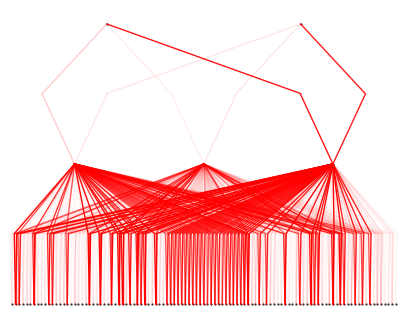

In [16]:
model.plot()
